<a href="https://colab.research.google.com/github/GeeteshT/Project/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(r"/gdrive/My Drive/Project/titanic_train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
missing_feature=[col for col in df.columns if(df[col].isnull().sum()>1)]
print(missing_feature)

['Age', 'Cabin', 'Embarked']


In [ ]:
for col in missing_feature:
  print(col,round(df[col].isnull().mean(),4))

Age 0.1987
Cabin 0.771
Embarked 0.0022


In [ ]:
#df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

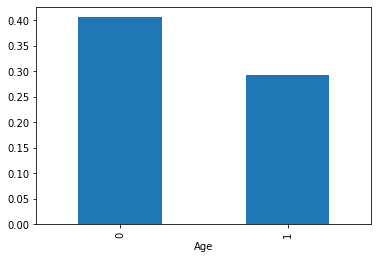

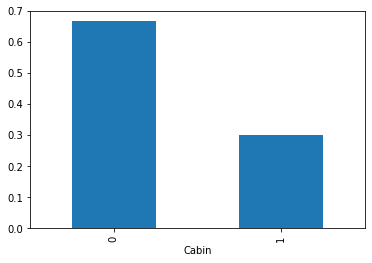

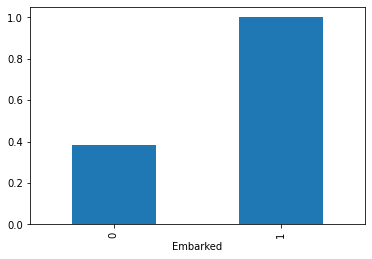

In [ ]:
for col in missing_feature:
  data=df.copy()
  data[col]=np.where(data[col].isnull(),1,0)
  data.groupby(col)["Survived"].mean().plot.bar()
  plt.show()

The cabin has the highst percentage of missing values i.e 77% and also from above we can see that it does not make much impact on the data frame.

In [ ]:
for col in df.select_dtypes("object").columns:
  print(col,len(df[col].unique()))

Name 891
Sex 2
Ticket 681
Cabin 148
Embarked 4


In [ ]:
df["new_sex"]=np.where(df["Sex"]=="male",1,0)

In [ ]:
df.select_dtypes("object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
df[["city","name"]]=df["Name"].str.split(",",expand=True) 
del df["name"]

In [ ]:
for col in df.select_dtypes("object").columns:
  print(df[col].value_counts())

Weir, Col. John                        1
Oreskovic, Miss. Marija                1
Cann, Mr. Ernest Charles               1
Samaan, Mr. Youssef                    1
McEvoy, Mr. Michael                    1
                                      ..
Jalsevac, Mr. Ivan                     1
Lines, Miss. Mary Conover              1
Kantor, Mrs. Sinai (Miriam Sternin)    1
Davis, Miss. Mary                      1
Jonsson, Mr. Carl                      1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
223596      1
2690        1
2003        1
26707       1
111427      1
Name: Ticket, Length: 681, dtype: int64
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C50            1
E38            1
C54            1
B101           1
E68            1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embark

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'new_sex', 'city'],
      dtype='object')

In [ ]:
df.drop(["PassengerId","Name","Sex","Cabin"],axis=1,inplace=True)

In [ ]:
for col in df.columns:
  print("====={}======".format(col))
  print(df[col].value_counts())
  print(len(df[col].unique()))

=====Survived======
0    549
1    342
Name: Survived, dtype: int64
2
=====Pclass======
3    491
1    216
2    184
Name: Pclass, dtype: int64
3
=====Age======
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
89
=====SibSp======
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
7
=====Parch======
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
7
=====Ticket======
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
223596      1
2690        1
2003        1
26707       1
111427      1
Name: Ticket, Length: 681, dtype: int64
681
=====Fare======
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
248
=====Embarked======
S    64

In [ ]:
df.drop("Ticket",axis=1,inplace=True)

In [ ]:
numerical_feature=[col for col in df.columns if(df[col].dtypes!="O")]
print(numerical_feature)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'new_sex']


In [ ]:
for col in numerical_feature:
  print(col,len(df[col].unique()))

Survived 2
Pclass 3
Age 89
SibSp 7
Parch 7
Fare 248
new_sex 2


In [ ]:
discrete_value=[col for col in numerical_feature if len(df[col].unique())<8]
print(discrete_value)

['Survived', 'Pclass', 'SibSp', 'Parch', 'new_sex']


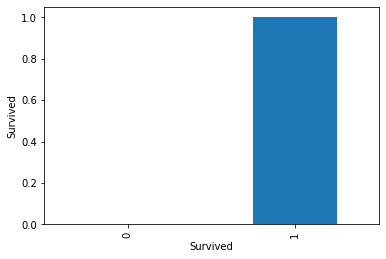

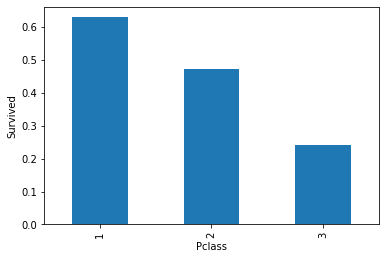

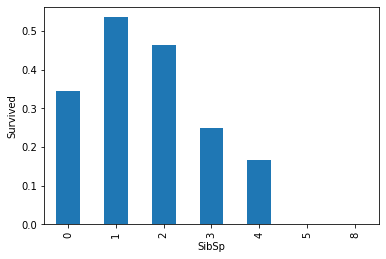

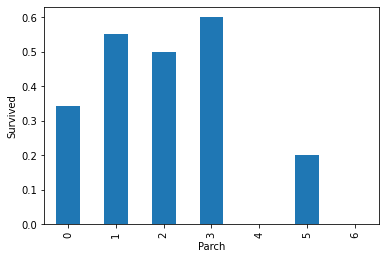

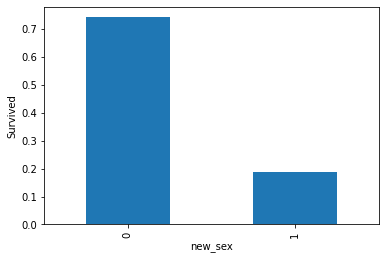

In [ ]:
for col in discrete_value:
  df.groupby(col)["Survived"].mean().plot.bar()
  plt.xlabel(col)
  plt.ylabel("Survived")
  plt.show()

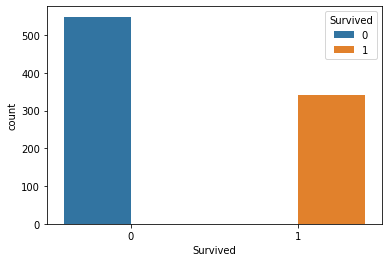

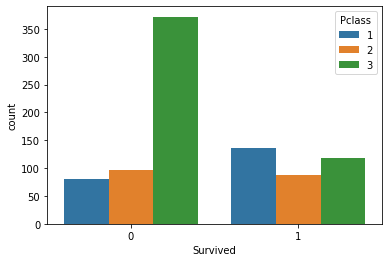

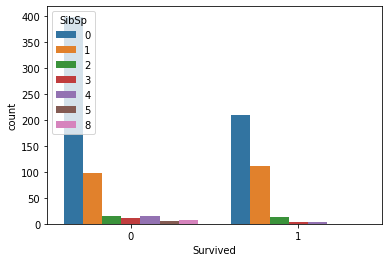

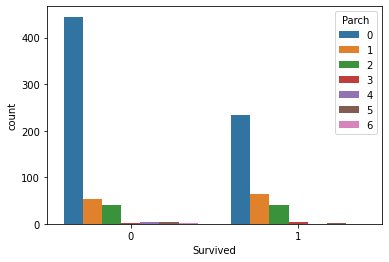

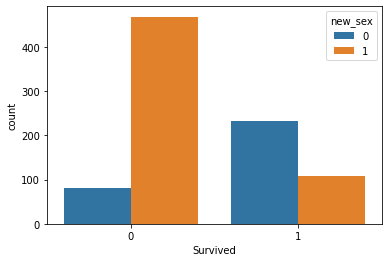

In [ ]:
for col in discrete_value:
  sns.countplot(x="Survived",hue=col,data=df)
  plt.show()

In [ ]:
continous_value=[col for col in numerical_feature if col not in discrete_value]
print(continous_value)

['Age', 'Fare']


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


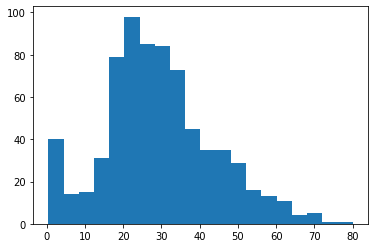

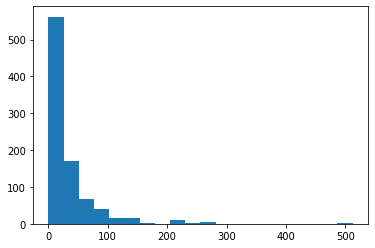

In [ ]:
for col in continous_value:
  plt.hist(df[col],bins=20)
  plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


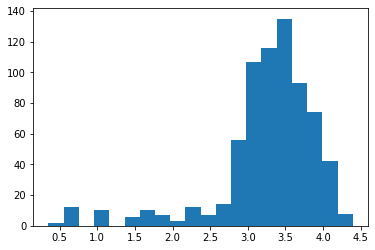

In [ ]:
for col in continous_value:
  data=df.copy()
  if 0 in data[col].unique():
    pass 
  else:
    data[col]=np.log(df[col]+1)
    plt.hist(data[col],bins=20)
    plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


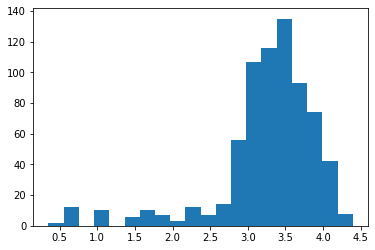

In [ ]:
for col in continous_value:
  if 0 in df[col].unique():
    pass 
  else:
    df[col]=np.log(df[col]+1)
    plt.hist(df[col],bins=20)
    plt.show()

In [ ]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [ ]:
df["Embarked"].fillna("S",inplace=True)

In [ ]:
for col in df.select_dtypes("object").columns:
  dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
  df=pd.concat([df,dummy],axis=1)
  del df[col]
  print(col)
del dummy

Embarked
city


In [ ]:
df.shape

(891, 675)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'new_sex',
       'Embarked_Q', 'Embarked_S', 'city_Abbott',
       ...
       'city_Yousseff', 'city_Yrois', 'city_Zabour', 'city_Zimmerman',
       'city_de Messemaeker', 'city_de Mulder', 'city_de Pelsmaeker',
       'city_del Carlo', 'city_van Billiard', 'city_van Melkebeke'],
      dtype='object', length=675)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(df,test_size=0.2,random_state=10)

In [ ]:
for col in train.columns:
  if((col is not "Survived") and (train[col].isnull().sum()>1)):
    train.loc[train[col].isnull(),col]=train[col].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
for col in test.columns:
  if((col is not "Survived") and (test[col].isnull().sum()>1)):
    test.loc[test[col].isnull(),col]=train[col].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
x_train=train.drop("Survived",axis=1)
y_train=train["Survived"]
x_test=test.drop("Survived",axis=1)
y_test=test["Survived"]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr=LogisticRegression(penalty="l1",random_state=10,class_weight="balanced",solver="liblinear")

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train,logr.predict(x_train))

0.8036375661375661

In [ ]:
roc_auc_score(y_test,logr.predict(x_test))

0.8096912048524951

In [ ]:
logr.classes_

array([0, 1])

In [ ]:
logr.predict_proba(x_test)

array([[0.87329601, 0.12670399],
       [0.81852061, 0.18147939],
       [0.84566957, 0.15433043],
       [0.04103393, 0.95896607],
       [0.08461302, 0.91538698],
       [0.81226015, 0.18773985],
       [0.84187486, 0.15812514],
       [0.77138559, 0.22861441],
       [0.86520079, 0.13479921],
       [0.82846633, 0.17153367],
       [0.67721066, 0.32278934],
       [0.04169502, 0.95830498],
       [0.29453544, 0.70546456],
       [0.46677911, 0.53322089],
       [0.70329681, 0.29670319],
       [0.70596079, 0.29403921],
       [0.96734734, 0.03265266],
       [0.89041545, 0.10958455],
       [0.37027498, 0.62972502],
       [0.79426628, 0.20573372],
       [0.90373903, 0.09626097],
       [0.64799711, 0.35200289],
       [0.22576425, 0.77423575],
       [0.89887769, 0.10112231],
       [0.6485459 , 0.3514541 ],
       [0.81695344, 0.18304656],
       [0.81803126, 0.18196874],
       [0.19615378, 0.80384622],
       [0.78580238, 0.21419762],
       [0.06408179, 0.93591821],
       [0.

In [ ]:
logr.class_weight

'balanced'

In [ ]:
prob_score= pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

In [ ]:
prob_score

0      0.203546
1      0.870632
2      0.616758
3      0.508823
4      0.201181
         ...   
707    0.971724
708    0.171189
709    0.704621
710    0.339469
711    0.263441
Length: 712, dtype: float64

In [ ]:
cutoffs=np.linspace(0,1,100)

In [ ]:
KS_cut = []
for cutoff in cutoffs:
    predicted = pd.Series([0] * len(y_train))
    predicted[prob_score>cutoff] = 1
    df = pd.DataFrame(list(zip(y_train, predicted)), columns=["real", "predicted"])
    TP = len(df[(df["real"] == 1) & (df["predicted"] == 1)])
    FP = len(df[(df["real"] == 0) & (df["predicted"] == 1)])
    TN = len(df[(df["real"] == 0) & (df["predicted"] == 0)])
    FN = len(df[(df["real"] == 1) & (df["predicted"] == 0)])
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P) - (FP/N)
    KS_cut.append(KS)
    
cutoff_data = pd.DataFrame(list(zip(cutoffs, KS_cut)), columns=["cutoff", "KS"])
KS_cutoff = cutoff_data[cutoff_data["KS"] == cutoff_data["KS"].max()]["cutoff"]
print(KS_cutoff)

48    0.484848
Name: cutoff, dtype: float64


In [ ]:
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])
print(prob_score_test)

0      0.126704
1      0.181479
2      0.154330
3      0.958966
4      0.915387
         ...   
174    0.374658
175    0.369485
176    0.108842
177    0.088498
178    0.644101
Length: 179, dtype: float64


In [ ]:
predicted_test=pd.Series([0]*len(y_test))
predicted_test

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Length: 179, dtype: int64

In [ ]:
predicted_test[prob_score_test>0.484848] = 1 #0.585859 #test 1: 0.565657

In [ ]:
roc_auc_score(y_test,predicted_test)

0.8054177005789909

# **Decision Tree**

In [ ]:
from sklearn.tree import tree

In [ ]:
dtree= tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,class_weight="balanced")

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=20, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
dtree_predicted=dtree.predict(x_test)

In [ ]:
dtree_test=pd.DataFrame(list(zip(y_test,dtree_predicted)),columns=["real","predicted"])

In [ ]:
k=pd.crosstab(dtree_test["real"],dtree_test["predicted"])

In [ ]:
k

predicted,0,1
real,,
0,94,23
1,6,56


In [ ]:
TP=k.iloc[1,1]
FP=k.iloc[0,1]
TN=k.iloc[0,0]
FN=k.iloc[1,0]

P=TP+FN
N=FP+TN

print("Accuracy: ", (TP+TN)/(P+N))
print("Sensitivity: ", TP/P)
print("Specificity: ", TN/N)

Accuracy:  0.8379888268156425
Sensitivity:  0.9032258064516129
Specificity:  0.8034188034188035


In [ ]:
max_nodes = list(range(5,100))

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
beta=2
FB_avg=[]
for max_node in max_nodes:
  mytree= tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=max_node,class_weight="balanced")
  kf=KFold(n_splits=5)
  FB_total =[]
  for train_,test_ in kf.split(x_train):
    mytree.fit(x_train.iloc[train_], y_train.iloc[train_])
    p = mytree.predict(x_train.iloc[test_])
    dtree_df=pd.DataFrame(list(zip(y_train,p)),columns=["real","predicted"])
    TP=len(dtree_df[(dtree_df["real"]==1) &(dtree_df["predicted"]==1) ])
    FP=len(dtree_df[(dtree_df["real"]==0) &(dtree_df["predicted"]==1) ])
    TN=len(dtree_df[(dtree_df["real"]==0) &(dtree_df["predicted"]==0) ])
    FN=len(dtree_df[(dtree_df["real"]==1) &(dtree_df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    Precision=TP/(TP+FP)
    Recall=TP/P
    
    FB = (1+beta**2)*Precision*Recall/((beta**2)*Precision + Recall)
    FB_total.extend([FB])
  FB_avg.extend([np.mean(FB_total)])
best_max_node = np.array(max_nodes)[FB_avg == max(FB_avg)][0]
print("max_best node:",best_max_node)

max_best node: 11


In [ ]:
dtree=tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=11,class_weight="balanced")
dtree.fit(x_train,y_train)
predicted=dtree.predict(x_test)
df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])
k=pd.crosstab(df_test["real"],df_test["predicted"])
k

predicted,0,1
real,,
0,89,28
1,6,56


In [ ]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

56 89 28 6
Accuracy is : 0.8100558659217877
Sensitivity is : 0.9032258064516129
Specificity is : 0.7606837606837606


In [ ]:
roc_auc_score(y_train,dtree.predict(x_train))

0.8133597883597884

In [ ]:
roc_auc_score(y_test,dtree.predict(x_test))

0.8319547835676868

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf=RandomForestClassifier(verbose=1,n_jobs=-1)

In [ ]:
param_dist= {"n_estimators":randint(10,700),
                       "max_depth": [3,5,7,10,None],
                       "max_features": randint(5,50),
                       "min_samples_split":randint(5,20),
                       "min_samples_leaf":randint(5,20),
                       "bootstrap":[True,False],
                       "criterion":["gini","entropy"]
            }
n_iter_search= 400
random_search=RandomizedSearchCV(clf,param_distributions=param_dist,n_iter=n_iter_search)
random_search.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Paral

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=43,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=17,
                       min_weight_fraction_leaf=0.0, n_estimators=53, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [ ]:
def report(grid_scores, n_top=3):
    idx = np.array([[i] for i in range(1,n_top+1)])
    top_scores_idx = np.where(grid_scores["rank_test_score"] == idx)[1]
    for i, top_idx in enumerate(top_scores_idx):
        print("Model with rank: {0}".format(i+1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
            grid_scores["mean_test_score"][top_idx],
            np.std(grid_scores["std_test_score"][top_idx])))
        print("Parameters: {0}".format(grid_scores["params"][top_idx]))
        print("")

In [ ]:
report(random_search.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.619 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 43, 'min_samples_leaf': 13, 'min_samples_split': 17, 'n_estimators': 53}

Model with rank: 2
Mean validation score: 0.612 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 48, 'min_samples_leaf': 10, 'min_samples_split': 11, 'n_estimators': 28}

Model with rank: 3
Mean validation score: 0.612 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 46, 'min_samples_leaf': 15, 'min_samples_split': 14, 'n_estimators': 26}



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=44,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False) **bold text**

In [ ]:
rf=RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 10, max_features = 43, min_samples_leaf = 13, min_samples_split = 17, n_estimators = 53)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=43,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=17,
                       min_weight_fraction_leaf=0.0, n_estimators=53,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
roc_auc_score(y_test,rf.predict(x_test))

0.5

In [ ]:
predicted=rf.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print(k)

predicted    0
real          
0          117
1           62


In [ ]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

IndexError: ignored

# **AdaBoosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_clf = DecisionTreeClassifier(criterion="entropy",class_weight="balanced",max_leaf_nodes=11)

In [ ]:
adb=AdaBoostClassifier(base_estimator=base_clf,n_estimators=20)

In [ ]:
lr=np.linspace(0.001,1,200)

In [ ]:
adb_params={"n_estimators": randint(5,200),
            "learning_rate":lr}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split

In [ ]:
complete_search=RandomizedSearchCV(adb,param_distributions=adb_params,scoring="roc_auc",verbose=1,n_jobs=-1,cv=10)

In [ ]:
complete_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.4s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=0.7889658291457287,
                                                n_estimators=29,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001     , 0.0060201 , 0.0110402 , 0.0160603 , 0.0210804 ,
       0.0261005 , 0.0311206 , 0.0361407 , 0.0411608 , 0.046...
       0.90461809, 0.90963819, 0.91465829, 0.91967839, 0.92469849,
       0.92971859, 0.93473869, 0.93975879, 0.94477889, 0.94979899,
       0.9548191 , 0.9598392 , 0.9648593 , 0.9698794 , 0.9748995 ,
       0.9799196 , 0.9849397 , 0.9899598 , 0.9949799 , 1.        ]),
                                        'n_estimators': <scipy.stats._distn_infrastruct

In [ ]:
complete_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.19678391959798996, n_estimators=55,
                   random_state=None)

In [ ]:
adb = AdaBoostClassifier(n_estimators=29, learning_rate=0.7889658291457287) #learning_rate=0.32228643216080405,n_est=193

#last best fit n_est=29, lr=0.7889658291457287

In [ ]:
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.7889658291457287, n_estimators=29,
                   random_state=None)

In [ ]:
roc_auc_score(y_train,adb.predict(x_train))

0.8274140211640211

In [ ]:
roc_auc_score(y_test,adb.predict(x_test))

0.8192031982354563

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
gbm_params = {
      "n_estimators":list(range(5,100)), 
      "learning_rate":np.linspace(0.00001,1,200),
      "max_depth":range(5,30),
      "subsample":np.linspace(0.01,1),
      "max_features":range(5,50),
      "min_samples_split":range(5,50),
      "min_samples_leaf":range(1,30),
      #"criterion":["gini","entropy"],
      }

first :
gbm_params = {
    "n_estimators":list(range(5,400)), 
    "learning_rate":np.linspace(0.001,1,200),
    "max_depth":range(5,40),
    "subsample":np.linspace(0.01,1),
    "max_features":range(5,100),
    "min_samples_split":range(5,50),
    "min_samples_leaf":range(5,50)
    
}
Second: 
gbm_params = {
      "n_estimators":list(range(5,100)), 
      "learning_rate":np.linspace(0.0001,1,200),
      "max_depth":range(5,40),
      "subsample":np.linspace(0.01,1),
      "max_features":range(5,100),
      "min_samples_split":range(5,50),
      "min_samples_leaf":range(1,100),
      #"criterion":["gini","entropy"],
      }

In [ ]:
gbm=GradientBoostingClassifier()

In [ ]:
random_search=RandomizedSearchCV(gbm,param_distributions=gbm_params,verbose=1,n_jobs=-1,
                                 scoring="roc_auc",cv=5,n_iter=300)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 1418 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   54.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
random_search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3467402010050252, loss='deviance',
                           max_depth=9, max_features=18, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=32,
                           min_weight_fraction_leaf=0.0, n_estimators=44,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8787755102040816,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbm=GradientBoostingClassifier(n_estimators=92, learning_rate=0.18601105527638193, max_depth=30,
                               subsample=0.2726530612244898, max_features=76,
                               min_samples_split=34, min_samples_leaf=1)
#(n_estimators=206, learning_rate=0.2620452261306533, max_depth=27,
                               #subsample=0.9191836734693878, max_features=17,
                               #min_samples_split=18, min_samples_leaf=12)
#(n_estimators=92, learning_rate=0.18601105527638193, max_depth=30,
                               #subsample=0.2726530612244898, max_features=76,
                               #min_samples_split=34, min_samples_leaf=1)

In [ ]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.18601105527638193, loss='deviance',
                           max_depth=30, max_features=76, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=34,
                           min_weight_fraction_leaf=0.0, n_estimators=92,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2726530612244898,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
roc_auc_score(y_train,gbm.predict(x_train))

0.9976851851851851

In [ ]:
roc_auc_score(y_test,gbm.predict(x_test))

0.8362972153294734